<a href="https://colab.research.google.com/github/mehtamishah/pandas-playground/blob/main/Population_GDP_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
population = pd.read_csv('population_data.csv', header = 2)
gdp = pd.read_csv('gdp_data.csv', header = 2)
population_region = pd.read_csv('population_incomegroup.csv')
gdp_region = pd.read_csv('gdp_incomegroup.csv')

In [35]:
population.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,59070.0,59442.0,59849.0,60236.0,60527.0,60653.0,60586.0,60366.0,60102.0,59972.0,60097.0,60561.0,61341.0,62213.0,62826.0,63024.0,62645.0,61838.0,61072.0,61033.0,62152.0,64623.0,68240.0,72495.0,76705.0,80324.0,83211.0,85450.0,87280.0,89009.0,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN


In [36]:
gdp.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929193e+10,1.970186e+10,2.147035e+10,2.570500e+10,2.350165e+10,2.678117e+10,2.912019e+10,3.014009e+10,3.284101e+10,3.770296e+10,4.027158e+10,4.442789e+10,4.824852e+10,6.291444e+10,7.816508e+10,8.334408e+10,8.311919e+10,9.488479e+10,1.062295e+11,1.243617e+11,1.563411e+11,1.602022e+11,1.544998e+11,1.595823e+11,1.458618e+11,1.302968e+11,1.468640e+11,1.795424e+11,1.887960e+11,1.943300e+11,2.121032e+11,2.205216e+11,2.199773e+11,2.203721e+11,2.245112e+11,2.524746e+11,2.518900e+11,2.648551e+11,2.497234e+11,2.464216e+11,2.676138e+11,2.414727e+11,2.470095e+11,3.258902e+11,4.047997e+11,4.705097e+11,5.321390e+11,6.115618e+11,6.662911e+11,6.692327e+11,8.036886e+11,8.962561e+11,9.131974e+11,9.276555e+11,9.563187e+11,8.930997e+11,8.547519e+11,9.622690e+11,9.840320e+11,9.778092e+11,8.984741e+11,NaN


In [37]:
population_region.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN


In [38]:
gdp_region.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN


Dropping empty columns

In [39]:
population["Unnamed: 65"].sum()

0.0

In [40]:
gdp["Unnamed: 65"].sum()

0.0

In [41]:
population_region["Unnamed: 5"].sum()

0.0

In [42]:
gdp_region["Unnamed: 5"].sum()

0.0

In [43]:
#Dropping the last column since it is empty
population.drop(axis = 1, columns = "Unnamed: 65", inplace = True)
gdp.drop(axis = 1, columns = "Unnamed: 65", inplace = True)
population_region.drop(axis = 1, columns = "Unnamed: 5", inplace = True)
gdp_region.drop(axis = 1, columns = "Unnamed: 5", inplace = True)

In [44]:
population_merged = population.merge(population_region, how = 'inner', on = 'Country Code')
gdp_merged = gdp.merge(gdp_region, how = 'inner', on = 'Country Code')

In [45]:
index_to_delete = population_merged[population_merged['Region'].isnull()].index.values
population_merged.drop(index = index_to_delete, inplace = True)

index_to_delete = gdp_merged[gdp_merged['Region'].isnull()].index.values
gdp_merged.drop(index = index_to_delete, inplace = True)

# Data Quality

Data completeness by country (% of years we have data for)

In [46]:
# for i in range (0, len(population)):
#   (population[population['Country Name']=='Aruba'].count(axis = 1)-4)*100/61
def data_completeness_by_country(df):
    d = len(df.loc[0,'1960':'2020'])
    result = []
    for i in df.index:
        null_count = sum(df.loc[i, '1960':'2020'].isnull())
        country = df.loc[i]['Country Name']
        result.append({'country':country, 'completeness' : round(((d-null_count)/d)* 100, 2)})
    return result
population_completeness = pd.DataFrame(data_completeness_by_country(population_merged))
gdp_completeness = pd.DataFrame(data_completeness_by_country(gdp_merged))
population_completeness.to_csv('population_completeness.csv')
gdp_completeness.to_csv('gdp_completeness.csv')

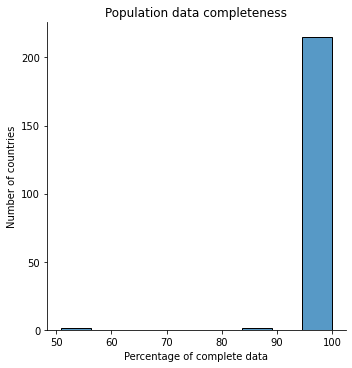

In [47]:
sns.displot(population_completeness, x = 'completeness')
plt.xlabel('Percentage of complete data')
plt.ylabel('Number of countries')
plt.title('Population data completeness')
plt.show()

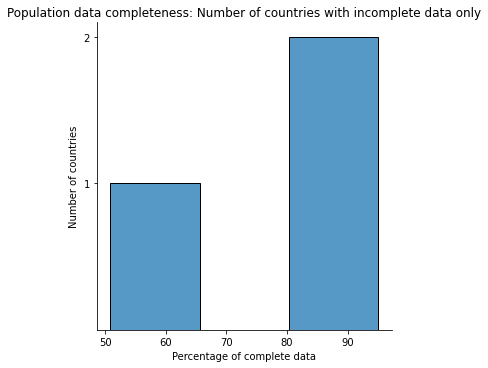

In [48]:
sns.displot(population_completeness[population_completeness['completeness'] != 100.0], x = 'completeness')
plt.xlabel('Percentage of complete data')
plt.ylabel('Number of countries')
plt.title('Population data completeness: Number of countries with incomplete data only')
plt.yticks(np.array([1,2]))
plt.show()

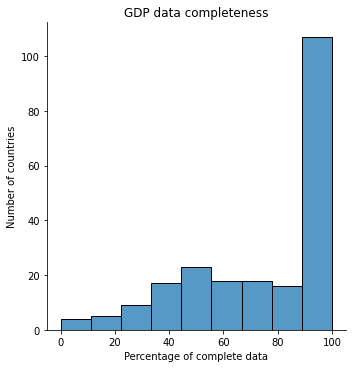

In [49]:
sns.displot(gdp_completeness, x = 'completeness')
plt.xlabel('Percentage of complete data')
plt.ylabel('Number of countries')
plt.title('GDP data completeness')
plt.show()

# 5. Population Summary Statistics

5A

In [50]:
population_region_summary_statistics = population_merged.groupby(by = 'Region').agg(["count", "mean", "std", "min", "max"])
population_region_summary_statistics.to_csv('5A Region population summary statistics.csv')

In [51]:
regions = population_merged['Region'].unique()
regions

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [52]:
LatinAmericaCaribbean = population_merged[population_merged['Region'] == 'Latin America & Caribbean'].loc[:,'1960':'2020']
SouthAsia = population_merged[population_merged['Region'] == 'South Asia'].loc[:,'1960':'2020']
SubSaharanAfrica = population_merged[population_merged['Region'] == 'Sub-Saharan Africa'].loc[:,'1960':'2020']
EuropeCentralAsia = population_merged[population_merged['Region'] == 'Europe & Central Asia'].loc[:,'1960':'2020']
MiddleEastNorthAfrica = population_merged[population_merged['Region'] == 'Middle East & North Africa'].loc[:,'1960':'2020']
EastAsiaPacific = population_merged[population_merged['Region'] == 'East Asia & Pacific'].loc[:,'1960':'2020']
NorthAmerica = population_merged[population_merged['Region'] == 'North America'].loc[:,'1960':'2020']

5B

POPULATION STATISTICS IN 2020 BY REGION


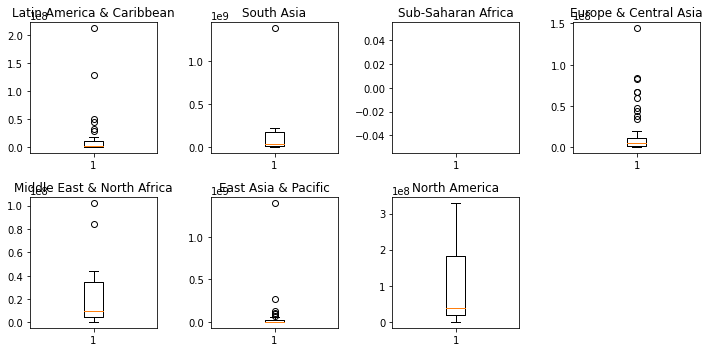

In [53]:
print("POPULATION STATISTICS IN 2020 BY REGION")
fig = plt.figure(figsize = (10, 5))

ax = plt.subplot("241")
ax.set_title("Latin America & Caribbean")
ax.boxplot(x = LatinAmericaCaribbean['2020'])

ax = plt.subplot("242")
ax.set_title("South Asia")
ax.boxplot(x = SouthAsia['2020'])

ax = plt.subplot("243")
ax.set_title("Sub-Saharan Africa")
ax.boxplot(x = SubSaharanAfrica['2020'])

ax = plt.subplot("244")
ax.set_title("Europe & Central Asia")
ax.boxplot(x = EuropeCentralAsia['2020'])

ax = plt.subplot("245")
ax.set_title("Middle East & North Africa")
ax.boxplot(x = MiddleEastNorthAfrica['2020'])

ax = plt.subplot("246")
ax.set_title("East Asia & Pacific")
ax.boxplot(x = EastAsiaPacific['2020'])

ax = plt.subplot("247")
ax.set_title("North America")
ax.boxplot(x = NorthAmerica['2020'])

fig.tight_layout()
plt.show()

# 6. Identify and report which countries have < 30% of GDP data points

In [54]:
countries_gdplessthan30 = gdp_completeness[gdp_completeness['completeness'] < 30]['country']

In [55]:
index_countries_gdplessthan30 = gdp_merged[gdp_merged['Country Name'].isin(countries_gdplessthan30.tolist())].index.values

In [56]:
countries_gdplessthan30.to_csv('6 dropped_countries.csv')
population_merged.drop(index = index_countries_gdplessthan30, inplace = True)
gdp_merged.drop(index = index_countries_gdplessthan30, inplace = True)

# 6. Infill missing GDP values

6A

In [57]:
#Removing non-numerical data
gdp_numeric = gdp_merged.loc[:,'1960':'2020']
population_numeric = population_merged.loc[:,'1960':'2020']

In [58]:
gdp_per_capita = gdp_numeric / population_numeric
avgoverallcountries_gdp_per_capita = gdp_per_capita.describe().loc['mean']

In [59]:
#Imputer gdp_per_capita dataframe by average gdp_per_capita for each year over all countries
for x in avgoverallcountries_gdp_per_capita.index.values:
  gdp_per_capita[x] = gdp_per_capita[x].fillna(avgoverallcountries_gdp_per_capita[x])

In [60]:
#Estimated GDP values
gdp_numeric = gdp_per_capita * population_numeric

In [61]:
#Added the estimated GDP values back into the dataframe
gdp_merged.loc[:,'1960':'2020'] = gdp_numeric

# 7. GDP percent of country by income group

In [62]:
total_gdp_by_income_group = gdp_merged.groupby('IncomeGroup').agg('sum')

In [63]:
percent_gdp_country = pd.merge(gdp_merged, total_gdp_by_income_group, how='left' ,on='IncomeGroup',suffixes=('_c','_ig'))

In [64]:
c_name =[str(x) for x in list(range(1960, 2021))]
for i in c_name:
  percent_gdp_country[i] = (percent_gdp_country[i + '_c']/percent_gdp_country[i + '_ig'])*100

percent_gdp_country_result = percent_gdp_country[['Country Name','Country Code'] + c_name]

In [65]:
#The % of GDP each country accounts for within its income group
percent_gdp_country_result.to_csv('CountryGDPpercentbyincomegroup.csv')
percent_gdp_country_result

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,0.002724,0.002729,0.002676,0.002660,0.002669,0.002764,0.002730,0.002611,0.002500,0.002476,0.002653,0.002676,0.002694,0.002810,0.003193,0.003360,0.003328,0.003196,0.003015,0.003098,0.003142,0.002973,0.002897,0.002708,0.002578,0.002444,0.003257,0.003384,0.003682,0.004109,0.004071,0.004397,0.004501,0.005052,0.005422,0.005166,0.005353,0.006047,0.006540,0.006444,0.006874,0.007106,0.006893,0.006395,0.006333,0.006264,0.006168,0.006081,0.006004,0.005827,0.005321,0.005259,0.005223,0.005555,0.005562,0.006252,0.006165,0.006115,0.005957,0.003271,0.002878
1,Afghanistan,AFG,1.627169,1.590750,1.467547,1.768830,1.866769,2.031027,2.582792,3.266084,2.547419,2.335182,2.439885,2.248866,1.679019,1.439605,1.378397,1.261425,1.245646,1.284318,1.249622,1.176515,1.007895,1.743305,22.160758,21.286393,20.637513,19.744132,21.552998,21.543427,21.949050,22.328365,28.822212,34.830035,40.901531,42.184139,46.922673,48.184331,48.498086,47.578017,47.601148,47.991179,48.205387,49.710582,2.105103,2.052298,2.036380,2.108831,2.051150,2.383018,1.298626,1.681039,1.971695,2.028040,2.272940,2.980072,2.864576,2.965094,2.796867,2.839930,2.649163,1.672768,1.949216
2,Angola,AGO,1.361298,1.350954,1.358891,1.332004,1.308458,1.405945,1.476889,1.887737,1.825660,1.792135,1.895394,1.976123,2.079702,2.156808,2.181246,2.243922,2.273120,2.277019,2.357132,2.448761,0.373370,0.328735,0.329480,0.351229,0.377403,0.518877,0.438133,0.539692,0.608459,0.698049,0.783941,4.062139,4.772531,6.071481,0.240538,0.347150,0.427967,0.427792,0.387783,0.429621,0.609011,0.583391,0.931394,0.944792,1.077944,1.455224,1.736550,1.759072,2.109932,1.648285,1.615495,1.892687,2.066808,2.167334,2.220728,1.804295,1.504156,1.686382,1.381454,1.156774,0.850038
3,Albania,ALB,0.331767,0.364983,0.357084,0.369191,0.366255,0.374166,0.378431,0.388036,0.398293,0.400079,0.439119,0.453887,0.468280,0.471287,0.488498,0.515490,0.529580,0.535182,0.558574,0.561525,0.574867,0.544254,0.551350,0.560064,0.088375,0.087994,0.090019,0.083917,0.084046,0.087582,0.072108,0.036429,0.022624,0.038458,0.057241,0.066524,0.081784,0.053946,0.061550,0.082219,0.081004,0.090737,0.099742,0.114981,0.122795,0.114461,0.106398,0.102764,0.101542,0.098796,0.080596,0.072226,0.064438,0.062190,0.062430,0.057241,0.059926,0.059420,0.064236,0.063750,0.063816
4,Andorra,AND,0.000674,0.000708,0.000732,0.000770,0.000817,0.000893,0.000930,0.000934,0.000937,0.000972,0.003297,0.003370,0.003685,0.004044,0.004414,0.004641,0.004399,0.004348,0.004410,0.005090,0.004888,0.004208,0.004111,0.003484,0.003371,0.003378,0.003872,0.004243,0.004453,0.004701,0.005477,0.005581,0.005682,0.004698,0.004429,0.004611,0.004748,0.004660,0.004760,0.004638,0.005243,0.005725,0.006234,0.007473,0.008227,0.008492,0.008793,0.009191,0.008935,0.008567,0.007679,0.007486,0.006572,0.006504,0.006521,0.005887,0.005986,0.005933,0.005987,0.005824,0.002083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Kosovo,XKX,0.195290,0.212419,0.207408,0.214064,0.211984,0.216298,0.218610,0.224065,0.229057,0.228897,0.250663,0.258700,0.266798,0.268398,0.278325,0.293453,0.301568,0.304474,0.317784,0.319820,0.327236,0.309855,0.313272,0.317847,0.314909,0.310538,0.338821,0.371306,0.415154,0.412025,0.419968,0.414198,0.458241,0.417123,0.413594,0.433745,0.417573,0.388059,0.374254,0.369695,0.043040,0.058654,0.055198,0.057177,0.060790,0.052072,0.046008,0.044811,0.044833,0.046377,0.039436,0.037549,0.033997,0.034437,0.034909,0.032388,0.033947,0.033068,0.033685,0.033167,0.032820
199,"Yemen, 

# GDP breakdown by Region

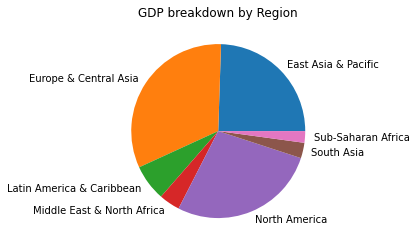

In [66]:
gdp_by_region = gdp_merged.groupby(by = 'Region').agg('sum').sum(axis = 1)
plt.pie(gdp_by_region, labels = gdp_by_region.index.values.tolist())
plt.title('GDP breakdown by Region')
plt.show()

# Top 10 countries by GDP for each region

In [67]:
gdp_2020_region = gdp_merged[['Country Name', '2020', 'Region']]
gdp_2020_region.head()

,Country Name,2020,Region
0,Aruba,1.405217e+09,Latin America & Caribbean
2,Afghanistan,1.980707e+10,South Asia
4,Angola,6.230691e+10,Sub-Saharan Africa
5,Albania,1.479962e+10,Europe & Central Asia
6,Andorra,1.016935e+09,Europe & Central Asia


In [68]:
#Ranking countries by gdp grouped by region
rank = gdp_2020_region.groupby('Region')['2020'].rank(ascending=False, method = 'min')
gdp_2020_region = pd.concat([gdp_2020_region, rank], axis = 1)
gdp_2020_region.columns = ['Country Name', '2020', 'Region', 'rank']

In [69]:
#cleaning
index_to_delete = gdp_2020_region[gdp_2020_region['rank'] > 10.0].index.values
top10_gdp_2020_region = gdp_2020_region.drop(index = index_to_delete)
index_to_delete = top10_gdp_2020_region[top10_gdp_2020_region['2020'].isnull()].index.values
top10_gdp_2020_region = top10_gdp_2020_region.drop(index = index_to_delete)
top10_gdp_2020_region = top10_gdp_2020_region.drop(columns = 'rank')
top10_gdp_2020_region['Region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Middle East & North Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America', 'Europe & Central Asia'], dtype=object)

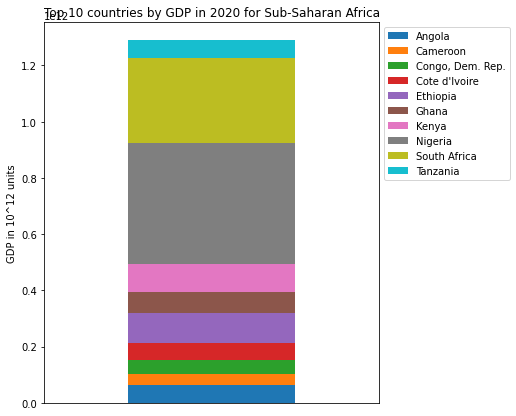

In [70]:
gdp_subsaharanafrica = top10_gdp_2020_region[top10_gdp_2020_region['Region'] == 'Sub-Saharan Africa']
pivot_gdp_subsaharanafrica = gdp_subsaharanafrica.pivot(index='Region', columns='Country Name', values='2020')
pivot_gdp_subsaharanafrica.plot(kind='bar', stacked=True, figsize = (6, 7))
plt.ylabel('GDP in 10^12 units')
plt.xlabel('')
plt.title('Top 10 countries by GDP in 2020 for Sub-Saharan Africa')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks([])
plt.show()

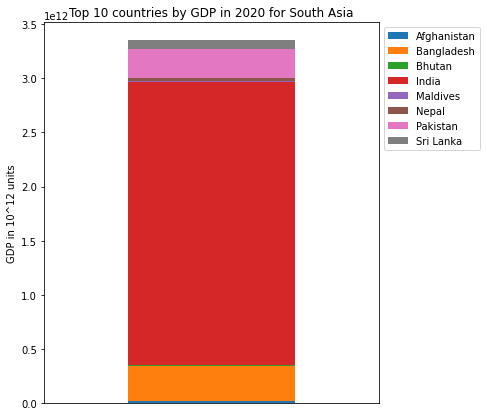

In [71]:
gdp_southasia = top10_gdp_2020_region[top10_gdp_2020_region['Region'] == 'South Asia']
pivot_gdp_southasia = gdp_southasia.pivot(index='Region', columns='Country Name', values='2020')
pivot_gdp_southasia.plot(kind='bar', stacked=True, figsize = (6, 7))
plt.ylabel('GDP in 10^12 units')
plt.xlabel('')
plt.title('Top 10 countries by GDP in 2020 for South Asia')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks([])
plt.show()

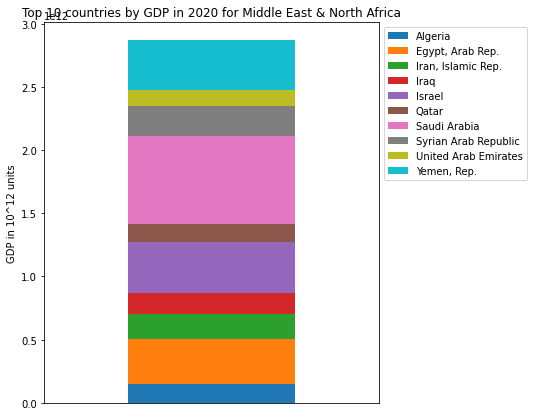

In [72]:
gdp_middleeastnorthafrica = top10_gdp_2020_region[top10_gdp_2020_region['Region'] == 'Middle East & North Africa']
pivot_gdp_middleeastnorthafrica = gdp_middleeastnorthafrica.pivot(index='Region', columns='Country Name', values='2020')
pivot_gdp_middleeastnorthafrica.plot(kind='bar', stacked=True, figsize = (6, 7))
plt.ylabel('GDP in 10^12 units')
plt.xlabel('')
plt.title('Top 10 countries by GDP in 2020 for Middle East & North Africa')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks([])
plt.show()

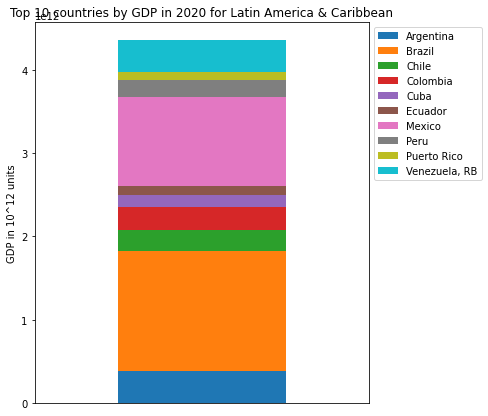

In [73]:
gdp_latinamericacaribbean = top10_gdp_2020_region[top10_gdp_2020_region['Region'] == 'Latin America & Caribbean']
pivot_gdp_latinamericacaribbean = gdp_latinamericacaribbean.pivot(index='Region', columns='Country Name', values='2020')
pivot_gdp_latinamericacaribbean.plot(kind='bar', stacked=True, figsize = (6, 7))
plt.ylabel('GDP in 10^12 units')
plt.xlabel('')
plt.title('Top 10 countries by GDP in 2020 for Latin America & Caribbean')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks([])
plt.show()

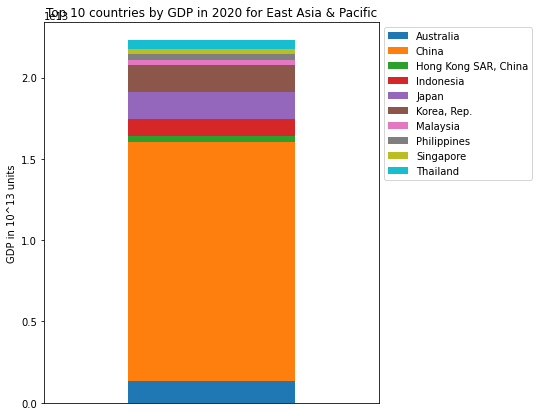

In [74]:
gdp_eastasiapacific = top10_gdp_2020_region[top10_gdp_2020_region['Region'] == 'East Asia & Pacific']
pivot_gdp_eastasiapacific = gdp_eastasiapacific.pivot(index='Region', columns='Country Name', values='2020')
pivot_gdp_eastasiapacific.plot(kind='bar', stacked=True, figsize = (6, 7))
plt.ylabel('GDP in 10^13 units')
plt.xlabel('')
plt.title('Top 10 countries by GDP in 2020 for East Asia & Pacific')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks([])
plt.show()

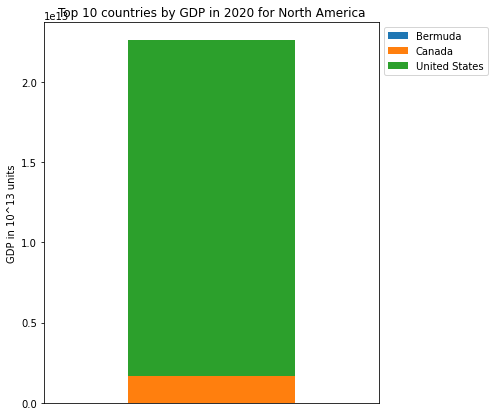

In [75]:
gdp_northamerica = top10_gdp_2020_region[top10_gdp_2020_region['Region'] == 'North America']
pivot_gdp_northamerica = gdp_northamerica.pivot(index='Region', columns='Country Name', values='2020')
pivot_gdp_northamerica.plot(kind='bar', stacked=True, figsize = (6, 7))
plt.ylabel('GDP in 10^13 units')
plt.xlabel('')
plt.title('Top 10 countries by GDP in 2020 for North America')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks([])
plt.show()

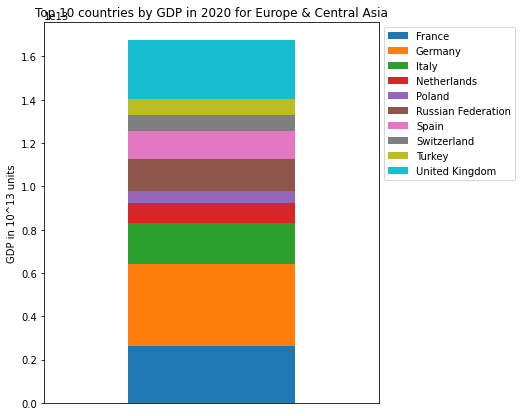

In [76]:
gdp_europecentralasia = top10_gdp_2020_region[top10_gdp_2020_region['Region'] == 'Europe & Central Asia']
pivot_gdp_europecentralasia = gdp_europecentralasia.pivot(index='Region', columns='Country Name', values='2020')
pivot_gdp_europecentralasia.plot(kind='bar', stacked=True, figsize = (6, 7))
plt.ylabel('GDP in 10^13 units')
plt.xlabel('')
plt.title('Top 10 countries by GDP in 2020 for Europe & Central Asia')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks([])
plt.show()

#CAGR

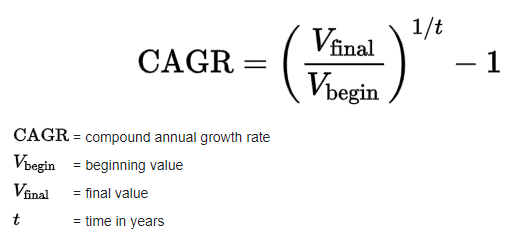

In [77]:
gdp_cagr3_intrm = pd.DataFrame()
for bgn,fnl in zip(list(range(1960, 2018)),list(range(1963, 2021))):
  gdp_cagr3_intrm[fnl] = gdp_numeric[str(fnl)] / gdp_numeric[str(bgn)]
  gdp_cagr3_intrm[fnl] = gdp_cagr3_intrm[fnl].apply(lambda x : np.power(x, 1/3) -1)
gdp_cagr_3year = pd.concat([gdp_merged['Country Name'], gdp_cagr3_intrm], axis = 1)
gdp_cagr_3year.to_csv('GDP_3year_CAGR.csv')

In [78]:
gdp_cagr5_intrm = pd.DataFrame()
for bgn,fnl in zip(list(range(1960, 2016)),list(range(1965, 2021))):
  gdp_cagr5_intrm[fnl] = gdp_per_capita[str(fnl)] / gdp_per_capita[str(bgn)]
  gdp_cagr5_intrm[fnl] = gdp_cagr5_intrm[fnl].apply(lambda x : np.power(x, 1/5) -1)
gdp_cagr_5year = pd.concat([gdp_merged['Country Name'], gdp_cagr5_intrm], axis = 1)
gdp_cagr_5year.to_csv('GDPpercapita_5year_CAGR.csv')